<a href="https://colab.research.google.com/github/Tyler9937/Simulation-Theory-Survey/blob/master/Simulation_Theory_Data_Cleaning_and_Analysis_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The following notebook contains all of the steps taken to create the Simulation Theory Data Storytelling Project

These steps include but are not limited to:


*   Data Cleaning
*   Data Analysis
*   Data Exploration
*   Data interpretation





In [1]:
#importing csv file from local system
from google.colab import files
uploaded = files.upload()

Saving Are We in a Simulation Experiment.csv to Are We in a Simulation Experiment.csv


In [2]:
#importing needed libraies
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import random

#importing raw csv
df_test= pd.read_csv('Are We in a Simulation Experiment.csv')

#examining raw csv
df_test.head()

,Timestamp,Do you personally believe in Simulation Theory (the idea that we live within a simulation),"What is your gender (if not listed click other and ""fill in the blank"" )",Does the world feel real to you,How old are you,On a scale of 1 to 5 how happy of a person are you (in general),On a scale of 1 to 5 how confident of a person are you,Scale of 1 to 5 how sociable are you,What is your religion,Do you ever wake up and feel like you are still dreaming,"Have you ever experienced ""Déjà Vu""",How many friends do you have (people whom you talk to every so often),Are you a fan of marijuana (weed),Do you own a VR headset,"How many books, articles, and videos have you read/ watched on the topic of Simulation Theory","Have you ever watched the movie ""The Matrix""",If yes to previous question Red pill or Blue pill,Do you know who Nick Bostrom is,"Have you ever witnessed an event that could be described as a ""glitch"" in our reality",If yes to the previous question you may describe it below. This is not required.,Are you a fan of Elon Musk,Do you own a Tesla,Would you consider yourself to think more logically or more abstractly,Do you believe in the existence of aliens,Are you familiar with the Fermi Paradox,Does the idea of living within a simulation change your perspective on life,"How much time (if any) have you spent on the topic of Simulation Theory(research, conversations, thinking/thought experiments)",Is the concept of Simulation Theory hard for you to grasp,Would you say you are a person of science (believe in facts backed up by repeated experiments and math),What kind of emotion do you feel toward the idea of living in a simulation with no hope of ever escaping,Where did you first hear about Simulation Theory,Do you believe that you are in control of your life,Select several of the following that interest you most,"There are several arguments for the theory that we are living in a simulation. Most of which conceptually almost definitely prove that we are in fact in a simulation. However, the purpose of this survey is to discover other insights. Thank you for taking the time to fill out this survey. Just for fun pick a random number 1-10.",Unnamed: 34
0,2019/11/12 12:30:09 AM EST,Yes,Male,Yes,20.0,4,5,3,Non-Religious,No,Yes,8,No,Yes,4+,Yes,Red pill (Knowledge),Yes,No,na,Yes,I wish...,Logically,Yes,Yes,Yes,6 to 12 hours,No,Yes,Curiosity,Elon Musk,Yes,Technology;Art;Math;Science Fiction;Space;Busi...,7,July 16th
1,2019/11/12 1:06:58 AM EST,Yes,Male,Unsure,21.0,4,2,4,Christianity,Yes,Yes,25,Depends on the day,No,4+,Yes,Red pill (Knowledge),Yes,No,NaN,Yes,I wish...,Abstractly,Yes,No,No,2 to 6 hours,No,Yes,Curiosity,Youtube,Yes,Sports,69,NaN
2,2019/11/12 1:50:31 AM EST,No,Male,Yes,19.0,3,3,2,Non-Religious,Yes,Yes,5,Yes,No,0,No,"Have not seen ""The Matrix""",No,No,NaN,Yes,I wish...,Logically,Yes,Yes,No,1 to 2 hours,No,Yes,Curiosity,A Friend,Yes,Technology;Movies;Science Fiction;Space;Video ...,7,NaN
3,2019/11/12 1:54:40 AM EST,Yes,Male,No,33.0,3,4,3,Non-Religious,No,No,1,No,No,4+,Yes,Red pill (Knowledge),Yes,No,NaN,Yes,No,Abstractly,Yes,Yes,Yes,24+ hours,No,No,I don't think we ultimately can't escape this ...,Other,No,Technology;Art;Math;Pop-Culture,5,NaN
4,2019/11/12 1:57:08 AM EST,Yes,Female,Yes,56.0,4,4,4,Non-Religious,Yes,Yes,2,No,Yes,4+,Yes,Red pill (Knowledge),Yes,Yes,I witnessed another version of myself be murde...,Yes,No,Logically,Yes,Yes,Yes,24+ hours,No,Yes,Intrigue,Nick Bossom,Yes,Technology;Movies;Science Fiction;Space;Business,7,NaN


In [0]:


#importing csv with simplified column names
#Removing wordy names
df= pd.read_csv('Are We in a Simulation Experiment.csv',skiprows=1, names=['timestamp','q1','q2','q3','q4','q5',
                                                                'q6','q7','q8','q9','q10','q11','q12','q13','q14',
                                                                'q15','q16','q17','q18','q19','q20','q21','q22','q23',
                                                                'q24','q25','q26','q27','q28','q29','q30','q31','q32','q33','Unnamed'])

# The following cell houses all of the dataframe cleaning steps needed to clean this dataset.

In [0]:
#Beginning the dataframe cleaning process
#Below is all of the cleaning needed for the first visualzaton

#dropping uneeded columns
df = df.drop(columns=['timestamp','Unnamed','q2','q4','q8','q9','q10','q16','q18','q19','q21','q22','q28','q30','q32','q33'])

#replacing strings with binary codes
df = df.replace({'No':0, 'Yes':1,'Unsure':0,'Depends on the day':1,
                 "I don't dislike him":1,'I wish...':1,})

#cleaning column q14 (knowledge)
def int_string(var):
  return int(var.strip('+'))

df['q14'] = df['q14'].apply(int_string)

#cleaning column q26 (knowledge)
def change_func(var):
  if var == '0 to 10 minutes':
    return int(var.replace('0 to 10 minutes','0'))
  elif var == '10 to 30 minutes':
    return int(var.replace('10 to 30 minutes','1'))
  elif var == '30 to 60 minutes':
    return int(var.replace('30 to 60 minutes','2'))
  elif var == '1 to 2 hours':
    return int(var.replace('1 to 2 hours','3'))
  elif var == '2 to 6 hours':
    return int(var.replace('2 to 6 hours','4'))
  elif var == '6 to 12 hours':
    return int(var.replace('6 to 12 hours','5'))
  elif var == '12 to 24 hours':
    return int(var.replace('12 to 24 hours','6'))
  elif var == '24+ hours':
    return int(var.replace('24+ hours','7'))
  else:
    pass

df['q26'] = df['q26'].apply(change_func)

#cleaning column q29 (depression)
def q29_func(x):
  if x != 'Depression' or x != 'Anxiety' or x != 'Sadness':
    return int(x = '0')
  elif x == 'Depression':
    return int(x.replace('Depression','3'))
  elif x == 'Anxiety':
    return int(x.replace('Anxiety','2'))
  elif x == 'Sadness':
    return int(x.replace('Sadness','1'))
  else:
    pass

df['q29'] = df['q29'].apply(q29_func)

#cleaning column q5 (Depression)
def q5_func(x):
  if x == 5:
    return int(x = 1)
  elif x == 4:
    return int(x = 2)
  elif x == 3:
    return int(x = 3)
  elif x == 2:
    return int(x = 4)
  elif x == 1:
    return int(x = 5)
  else:
    pass

df['q5'] = df['q5'].apply(q5_func)

#cleaning column q3 (Depression)
def q3_func(x):
  if x == 1:
    return int(x = 0)
  else:
    return int(x = 1)

df['q3'] = df['q3'].apply(q3_func)

#cleaning column q11 (social)
def q11_func(x):
  x = str(x)
  return float(x.replace('+',''))

df['q11'] = df['q11'].apply(q11_func)

#cleaning column q25 (confidence)
def q25_func(x):
  if x == 1:
    return int(x = 0)
  else:
    return int(x = 1)

df['q25'] = df['q25'].apply(q11_func)

#cleaning column q27 (confidence)
def q27_func(x):
  if x == 1:
    return int(x = 0)
  else:
    return int(x = 1)

df['q27'] = df['q27'].apply(q11_func)

In [5]:
#Examining the cleaned dataframe
df.head()

,q1,q3,q5,q6,q7,q11,q12,q13,q14,q15,q17,q20,q23,q24,q25,q26,q27,q29,q31
0,1,0,2,5,3,8.0,0,1,4,1,1,1,1,1,1.0,5,0.0,0,1
1,1,1,2,2,4,25.0,1,0,4,1,1,1,1,0,0.0,4,0.0,0,1
2,0,0,3,3,2,5.0,1,0,0,0,0,1,1,1,0.0,3,0.0,0,1
3,1,1,3,4,3,1.0,0,0,4,1,1,1,1,1,1.0,7,0.0,0,0
4,1,0,2,4,4,2.0,0,1,4,1,1,1,1,1,1.0,7,0.0,0,1


In [0]:
#Creating several new columns to simplify analysis
df['knowledge'] = df['q17'] + df['q14'] + df['q26']

df['depression'] = df['q3'] + df['q5'] + df['q29']

df['social'] = df['q7'] + df['q11']

df['confidence'] = df['q6'] + df['q25'] + df['q27'] + df['q31']

In [0]:
#creating the needed subsets to answer or main questions
st_no = df[df['q1'] == 0]
st_yes = df[df['q1'] == 1]

In [0]:
#Taking even samples from each group for equal comparison
st_no_sample = st_no[0:50]
st_yes_sample = st_yes[0:50]

In [0]:
#saving vales that will be graphable
knowledge_total_yes = st_yes_sample['knowledge'].sum()
knowledge_total_no = st_no_sample['knowledge'].sum()

depression_total_yes = st_yes_sample['depression'].sum()
depression_total_no = st_no_sample['depression'].sum()

social_total_yes = st_yes_sample['social'].sum()
social_total_no = st_no_sample['social'].sum()

confidence_total_yes = st_yes_sample['confidence'].sum()
confidence_total_no = st_no_sample['confidence'].sum()

In [18]:
#Examining dataset with added clolumns
df.head()

,q1,q3,q5,q6,q7,q11,q12,q13,q14,q15,q17,q20,q23,q24,q25,q26,q27,q29,q31,knowledge,depression,social,confidence
0,1,0,2,5,3,8.0,0,1,4,1,1,1,1,1,1.0,5,0.0,0,1,10,2,11.0,7
1,1,1,2,2,4,25.0,1,0,4,1,1,1,1,0,0.0,4,0.0,0,1,9,3,29.0,3
2,0,0,3,3,2,5.0,1,0,0,0,0,1,1,1,0.0,3,0.0,0,1,3,3,7.0,4
3,1,1,3,4,3,1.0,0,0,4,1,1,1,1,1,1.0,7,0.0,0,0,12,4,4.0,5
4,1,0,2,4,4,2.0,0,1,4,1,1,1,1,1,1.0,7,0.0,0,1,12,2,6.0,6


# The Following is the ploting of our first visualization  comparing Personalities against people who belived in Simulation Theroy Vs people who did not.

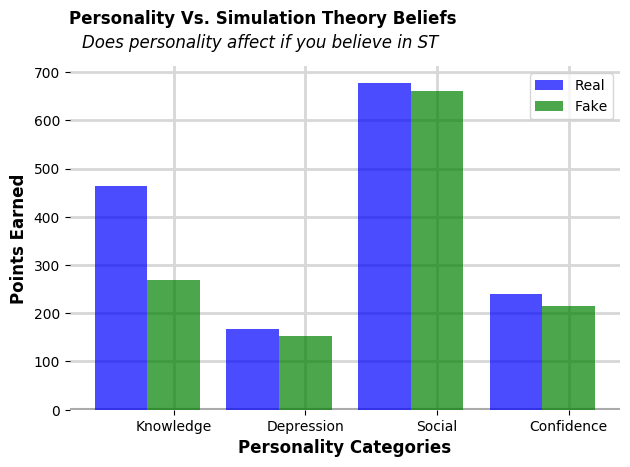

In [19]:
# data to plot
n_groups = 4
means_yes = (knowledge_total_yes, depression_total_yes,
               social_total_yes, confidence_total_yes)
means_no = (knowledge_total_no, depression_total_no,
               social_total_no, confidence_total_no)


# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.4
opacity = 0.7

rects1 = plt.bar(index, means_yes, bar_width,
alpha=opacity,
color='b',
label='Real',
zorder =3,)

rects2 = plt.bar(index + bar_width, means_no, bar_width,
alpha=opacity,
color='g',
label='Fake',
zorder = 3)


# Set axes background color
ax.set(facecolor='white')

ax.axhline(y=1, color='#ABABAB')

ax.grid(color='#D7D7D7', linestyle='-', linewidth=2)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Set subtitle
ax.text(s='Does personality affect if you believe in ST', x=-.3, y=750, fontsize=12,fontstyle='italic')


plt.xlabel('Personality Categories', fontsize=12, fontweight='bold')
plt.ylabel('Points Earned', fontsize=12, fontweight='bold')
plt.title("Personality Vs. Simulation Theory Beliefs", fontsize=12, fontweight='bold', x=.35, y=1.1)
plt.xticks(index + bar_width, ('Knowledge', 'Depression', 'Social', 'Confidence'))
plt.legend()

plt.tight_layout()
plt.show()

In [0]:
#creating confidence intervales function
def confidence_interval(data, confidence=0.95):
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = np.std(data, ddof=1)/np.sqrt(n)
  moe = stderr * stats.t.ppf((1 + confidence) / 2.0, n-1)
  return (mean - moe,mean,mean + moe)

#creating new vars from CI
ci_q12 = confidence_interval(st_yes['q12'])
ci_q13 = confidence_interval(st_yes['q13'])
ci_q15 = confidence_interval(st_yes['q15'])
ci_q17 = confidence_interval(st_yes['q17'])
ci_q20 = confidence_interval(st_yes['q20'])
ci_q24 = confidence_interval(st_yes['q24'])
ci_q23 = confidence_interval(st_yes['q23'])

In [0]:
#saving the means into variables
a = st_yes['q12'].mean()
b = st_yes['q13'].mean()
c = st_yes['q15'].mean()
d = st_yes['q17'].mean()
e = st_yes['q20'].mean()
f = st_yes['q24'].mean()
g = st_yes['q23'].mean()

# The Following is the ploting of our second visualization comparing percents of people that said yes to certain question in the survey who belived in Simulation Theory.

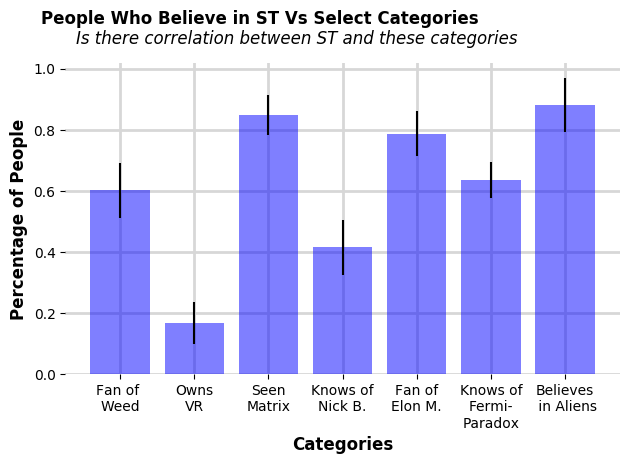

In [25]:
# data to plot

#Creating a series of the object means
means = pd.Series([a,b,c,d,e,f,g], 
                  index=range(1,8))

#Creating the plotable confidence intervales
ci = [(ci_q12[1] - ci_q12[2]), (ci_q13[1] - ci_q13[2]), (ci_q15[1] - ci_q15[2]),
      (ci_q17[1] - ci_q17[2]),(ci_q20[1] - ci_q20[2]),(ci_q23[1] - ci_q23[2]),(ci_q24[1] - ci_q24[2])]

#Creating the object names
objects = ('Fan of \nWeed', 'Owns\nVR','Seen\nMatrix', 'Knows of\nNick B.','Fan of\nElon M.','Knows of\nFermi-\nParadox','Believes\n in Aliens')

#saving the index distance as a var
index = np.arange(len(objects))

#creating needed vars
bar_width = .8
opacity = .5

#Creating subplots
fig, ax = plt.subplots()

#creating main bar plots
react1 =plt.bar(index + bar_width, means, bar_width,
alpha=opacity,
color='b',
label='ST is Fake',
zorder = 3,
align = 'center',
yerr=ci)

# Set subtitle
ax.text(s='Is there correlation between ST and these categories', x=.2, y=1.08, fontsize=12,fontstyle='italic')

#Set tick marks and labels
plt.xticks(index + bar_width, objects)
plt.xlabel('Categories', fontsize=12, fontweight='bold')
plt.ylabel('Percentage of People', fontsize=12, fontweight='bold')
plt.title("People Who Believe in ST Vs Select Categories", fontsize=12, fontweight='bold', x=.35, y=1.1)


# Set axes background color
ax.set(facecolor='white')

#creating a grid
ax.grid(color='#D7D7D7', linestyle='-', linewidth=2)

#removes grid borders
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)




plt.tight_layout()
plt.show()